In [1]:
import os
import torch
import cv2
from model import SAStereoCNN2
from tqdm import tqdm
import matplotlib.pyplot as plt

In [ ]:
CHECKPOINT_PATH = 'stereo_cnn_stereo_cnn_sa_baseline.checkpoint'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
model = SAStereoCNN2(device)
model.to(device)
if os.path.exists(CHECKPOINT_PATH):
    print("loading existing checkpoint ...")
    checkpoint = torch.load(CHECKPOINT_PATH)
    model.load_state_dict(checkpoint)


loading existing checkpoint ...


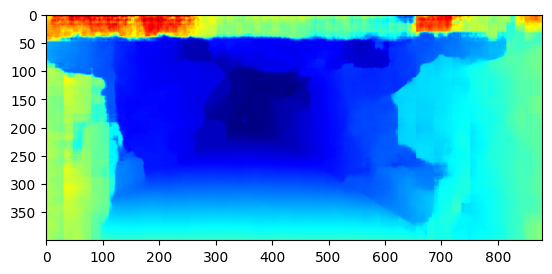

In [5]:
orig_left_image = cv2.imread('sample/left_images/2018-10-19-10-33-08_2018-10-19-11-06-02-333.jpg')
orig_right_img = cv2.imread('sample/right_images/2018-10-19-10-33-08_2018-10-19-11-06-02-333.jpg')

model.eval()
with torch.no_grad():
    disparity, _ = model.inference(orig_left_image, orig_right_img)

    disparity = disparity.squeeze(0).cpu().numpy()
    disparity = disparity.transpose((1, 2, 0))

    # enhance disparity map
    disparity = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX)
    disparity = cv2.convertScaleAbs(disparity)
    disparity = cv2.applyColorMap(disparity, cv2.COLORMAP_JET)
    disparity = cv2.cvtColor(disparity, cv2.COLOR_BGR2RGB)
    disparity = cv2.resize(disparity, (orig_left_image.shape[1], orig_left_image.shape[0]))

    # plot disparity map
    plt.imshow(disparity)
    plt.show()
    